<a href="https://colab.research.google.com/github/Si-Mun/Machine-Learning/blob/main/Build%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Preprocess Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.optimizers import RMSprop
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
!gdown 1tpvQ4P3t0MWGUr43Kq3B397zvC8mxU63

Downloading...
From: https://drive.google.com/uc?id=1tpvQ4P3t0MWGUr43Kq3B397zvC8mxU63
To: /content/photos_batch2.zip
100% 452M/452M [00:04<00:00, 91.9MB/s]


In [ ]:
!gdown 1OEF0KJoBXJdQNP_SPBAnHW_xfh8rvv5-

Downloading...
From: https://drive.google.com/uc?id=1OEF0KJoBXJdQNP_SPBAnHW_xfh8rvv5-
To: /content/Salinan photos_revised.zip
100% 410M/410M [00:05<00:00, 75.4MB/s]


In [ ]:
local_zip = '/content/Salinan photos_revised.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
local_zip = '/content/photos_batch2.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
path_ori = '/tmp/photos'

In [ ]:
# source_path_baterai = os.path.join(path_ori, 'batu baterai')
source_path_cap = os.path.join(path_ori, 'cap')
source_path_cookset = os.path.join(path_ori, 'cooking set hike')
source_path_medis = os.path.join(path_ori, 'first aid kit')
# source_path_gelas = os.path.join(path_ori, 'gelas plastik')
source_path_topi = os.path.join(path_ori, 'hat')
source_path_headlamp = os.path.join(path_ori, 'headlamp climbing')
source_path_pisau = os.path.join(path_ori, 'knife')
# source_path_lampu = os.path.join(path_ori, 'lampu tenda')
# source_path_powerbank = os.path.join(path_ori, 'powerbank')
source_path_jashujan = os.path.join(path_ori, 'raincoat')
# source_path_sarungtangan = os.path.join(path_ori, 'sarung tangan')
# source_path_socks = os.path.join(path_ori, 'socks')
# source_path_handuk = os.path.join(path_ori, 'towel')
# source_path_trashbag = os.path.join(path_ori, 'trash bag')
source_path_pole = os.path.join(path_ori, 'trekking pole')
source_path_flashlight = os.path.join(path_ori, 'flashlight')
# source_path_botol = os.path.join(path_ori, 'botol air')
source_path_jacket = os.path.join(path_ori, 'jackets')
source_path_backpack = os.path.join(path_ori, 'carrier bag')
source_path_matras = os.path.join(path_ori, 'matras camping')
source_path_sandal = os.path.join(path_ori, 'outdoors sandals')
source_path_gas = os.path.join(path_ori, 'portable gas')
source_path_stove = os.path.join(path_ori, 'portable stove')
source_path_shoes = os.path.join(path_ori, 'shoes')
source_path_sleep = os.path.join(path_ori, 'sleeping bag')
# source_path_tent = os.path.join(path_ori, 'tent bag')
source_path_trousers = os.path.join(path_ori, 'trousers')
# source_path_shirt = os.path.join(path_ori, 't-shirt')

In [ ]:
print(f"There are {len(os.listdir(source_path_pole))} images of Tracking Pole.")
print(f"There are {len(os.listdir(source_path_flashlight))} images of Gelas Plastik.")

There are 430 images of Tracking Pole.
There are 651 images of Gelas Plastik.


In [ ]:
root_dir = '/tmp/capstone'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets

  Args:
    root_path (string) - the base directory path to create subdirectories from

  Returns:
    None
  """

  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  rootie = os.makedirs(root_path)
  train_dir = os.path.join(root_path, 'training')
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(train_dir)
  os.makedirs(validation_dir)
  # Directory with training hike equipment pictures
  # train_baterai_dir = os.path.join(train_dir, 'baterai')
  # train_cap_dir = os.path.join(train_dir, 'cap')
  train_cookset_dir = os.path.join(train_dir, 'cooking set hike')
  train_aidkit_dir = os.path.join(train_dir, 'first aid kit')
  # train_gelas_dir = os.path.join(train_dir, 'gelas plastik')
  train_hat_dir = os.path.join(train_dir, 'hat')
  train_headlamp_dir = os.path.join(train_dir, 'headlamp climbing')
  train_knife_dir = os.path.join(train_dir, 'knife')
  # train_lampu_dir = os.path.join(train_dir, 'lampu tenda')
  # train_powerbank_dir = os.path.join(train_dir, 'powerbank')
  train_raincoat_dir = os.path.join(train_dir, 'raincoat')
  # train_gloves_dir = os.path.join(train_dir, 'sarung tangan')
  # train_socks_dir = os.path.join(train_dir, 'socks')
  # train_towel_dir = os.path.join(train_dir, 'towel')
  # train_trashbag_dir = os.path.join(train_dir, 'trash bag')
  train_pole_dir = os.path.join(train_dir, 'trekking pole')
  train_flash_dir = os.path.join(train_dir, 'flashlight')
  # train_botol_dir = os.path.join(train_dir, 'botol air')
  train_jacket_dir = os.path.join(train_dir, 'jaket')
  train_backpack_dir = os.path.join(train_dir, 'carrier bag')
  train_matras_dir = os.path.join(train_dir, 'matras camping')
  train_sandal_dir = os.path.join(train_dir, 'outdoor footwear')
  # train_gas_dir = os.path.join(train_dir, 'portable gas')
  train_stove_dir = os.path.join(train_dir, 'portable stove')
  # train_shoes_dir = os.path.join(train_dir, 'shoes')
  train_sleep_dir = os.path.join(train_dir, 'sleeping bag')
  # train_tent_dir = os.path.join(train_dir, 'tent bag')
  train_trousers_dir = os.path.join(train_dir, 'trousers')
  # train_shirt_dir = os.path.join(train_dir, 't-shirt')
  os.makedirs(train_flash_dir)
  # os.makedirs(train_botol_dir)
  os.makedirs(train_jacket_dir)
  os.makedirs(train_backpack_dir)
  os.makedirs(train_matras_dir)
  os.makedirs(train_sandal_dir)
  # os.makedirs(train_gas_dir)
  os.makedirs(train_stove_dir)
  # os.makedirs(train_shoes_dir)
  os.makedirs(train_sleep_dir)
  # os.makedirs(train_tent_dir)
  os.makedirs(train_trousers_dir)
  # os.makedirs(train_shirt_dir)
  os.makedirs(train_aidkit_dir)
  # os.makedirs(train_baterai_dir)
  # os.makedirs(train_cap_dir)
  os.makedirs(train_cookset_dir)
  # os.makedirs(train_gelas_dir)
  # os.makedirs(train_gloves_dir)
  os.makedirs(train_hat_dir)
  os.makedirs(train_headlamp_dir)
  os.makedirs(train_knife_dir)
  # os.makedirs(train_lampu_dir)
  os.makedirs(train_pole_dir)
  # os.makedirs(train_powerbank_dir)
  os.makedirs(train_raincoat_dir)
  # os.makedirs(train_socks_dir)
  # os.makedirs(train_towel_dir)
  # os.makedirs(train_trashbag_dir)
  #Directory with validation hike equipment pictures
  # val_baterai_dir = os.path.join(validation_dir, 'baterai')
  # val_cap_dir = os.path.join(validation_dir, 'cap')
  val_cookset_dir = os.path.join(validation_dir, 'cooking set hike')
  val_aidkit_dir = os.path.join(validation_dir, 'first aid kit')
  # val_gelas_dir = os.path.join(validation_dir, 'gelas plastik')
  val_hat_dir = os.path.join(validation_dir, 'hat')
  val_headlamp_dir = os.path.join(validation_dir, 'headlamp climbing')
  val_knife_dir = os.path.join(validation_dir, 'knife')
  # val_lampu_dir = os.path.join(validation_dir, 'lampu tenda')
  # val_powerbank_dir = os.path.join(validation_dir, 'powerbank')
  val_raincoat_dir = os.path.join(validation_dir, 'raincoat')
  # val_gloves_dir = os.path.join(validation_dir, 'sarung tangan')
  # val_socks_dir = os.path.join(validation_dir, 'socks')
  # val_towel_dir = os.path.join(validation_dir, 'towel')
  # val_trashbag_dir = os.path.join(validation_dir, 'trash bag')
  val_pole_dir = os.path.join(validation_dir, 'trekking pole')
  validation_flash_dir = os.path.join(validation_dir, 'flashlight')
  # validation_botol_dir = os.path.join(validation_dir, 'botol air')
  validation_jacket_dir = os.path.join(validation_dir, 'jaket')
  validation_backpack_dir = os.path.join(validation_dir, 'carrier bag')
  validation_matras_dir = os.path.join(validation_dir, 'matras camping')
  validation_footwear_dir = os.path.join(validation_dir, 'outdoor footwear')
  # validation_gas_dir = os.path.join(validation_dir, 'portable gas')
  validation_stove_dir = os.path.join(validation_dir, 'portable stove')
  # validation_shoes_dir = os.path.join(validation_dir, 'shoes')
  validation_sleep_dir = os.path.join(validation_dir, 'sleeping bag')
  # validation_tent_dir = os.path.join(validation_dir, 'tent bag')
  validation_trousers_dir = os.path.join(validation_dir, 'trousers')
  # validation_shirt_dir = os.path.join(validation_dir, 't-shirt')
  os.makedirs(validation_flash_dir)
  # os.makedirs(validation_botol_dir)
  os.makedirs(validation_jacket_dir)
  os.makedirs(validation_backpack_dir)
  os.makedirs(validation_matras_dir)
  os.makedirs(validation_footwear_dir)
  # os.makedirs(validation_gas_dir)
  os.makedirs(validation_stove_dir)
  # os.makedirs(validation_shoes_dir)
  os.makedirs(validation_sleep_dir)
  # os.makedirs(validation_tent_dir)
  os.makedirs(validation_trousers_dir)
  # os.makedirs(validation_shirt_dir)
  os.makedirs(val_aidkit_dir)
  # os.makedirs(val_baterai_dir)
  # os.makedirs(val_cap_dir)
  os.makedirs(val_cookset_dir)
  # os.makedirs(val_gelas_dir)
  # os.makedirs(val_gloves_dir)
  os.makedirs(val_hat_dir)
  os.makedirs(val_headlamp_dir)
  os.makedirs(val_knife_dir)
  # os.makedirs(val_lampu_dir)
  os.makedirs(val_pole_dir)
  # os.makedirs(val_powerbank_dir)
  os.makedirs(val_raincoat_dir)
  # os.makedirs(val_socks_dir)
  # os.makedirs(val_towel_dir)
  # os.makedirs(val_trashbag_dir)




try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/capstone/validation
/tmp/capstone/training
/tmp/capstone/validation/hat
/tmp/capstone/validation/flashlight
/tmp/capstone/validation/raincoat
/tmp/capstone/validation/first aid kit
/tmp/capstone/validation/portable stove
/tmp/capstone/validation/cooking set hike
/tmp/capstone/validation/knife
/tmp/capstone/validation/jaket
/tmp/capstone/validation/trekking pole
/tmp/capstone/validation/trousers
/tmp/capstone/validation/sleeping bag
/tmp/capstone/validation/outdoor footwear
/tmp/capstone/validation/headlamp climbing
/tmp/capstone/validation/matras camping
/tmp/capstone/validation/carrier bag
/tmp/capstone/training/hat
/tmp/capstone/training/flashlight
/tmp/capstone/training/raincoat
/tmp/capstone/training/first aid kit
/tmp/capstone/training/portable stove
/tmp/capstone/training/cooking set hike
/tmp/capstone/training/knife
/tmp/capstone/training/jaket
/tmp/capstone/training/trekking pole
/tmp/capstone/training/trousers
/tmp/capstone/training/sleeping bag
/tmp/capstone/training/out

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """
  ### START CODE HERE
  allFileNames = os.listdir(SOURCE_DIR)
  valdiFile=[]
  for i in allFileNames:
    sizem = os.path.getsize(os.path.join(SOURCE_DIR, i))
    if sizem > 0:
      valdiFile.append(i)
    else:
      print("filename is zero length, so ignoring.")
  testi=random.sample(valdiFile, len(valdiFile))
  split = int(SPLIT_SIZE * len(valdiFile))
  trains = testi[:split]
  valids= testi[split:]
  for file_name in trains:
    copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(TRAINING_DIR, file_name))
  for file_name in valids:
    copyfile(os.path.join(SOURCE_DIR, file_name), os.path.join(VALIDATION_DIR, file_name))


  ### END CODE HERE

In [ ]:
cdir=os.listdir(path_ori)
for i in cdir:
    #print(len(os.listdir(path_ori+'//'+i)))
    print(f"There are {len(os.listdir(path_ori+'//'+i))} images of {i} for training")

There are 167 images of hat for training
There are 1474 images of shoes for training
There are 651 images of flashlight for training
There are 537 images of t-shirt for training
There are 284 images of tent bag for training
There are 301 images of trash bag for training
There are 484 images of portable gas for training
There are 318 images of raincoat for training
There are 521 images of outdoors sandals for training
There are 260 images of first aid kit for training
There are 644 images of powerbank for training
There are 457 images of portable stove for training
There are 179 images of cap for training
There are 636 images of lampu tenda for training
There are 512 images of gelas plastik for training
There are 526 images of cooking set hike for training
There are 893 images of sarung tangan for training
There are 271 images of socks for training
There are 313 images of knife for training
There are 486 images of jackets for training
There are 571 images of batu baterai for training
Th

In [ ]:
#dataset tambahan 16 kelas
# BATERAI_SOURCE_DIR ='/tmp/photos/batu baterai'
CAP_SOURCE_DIR ='/tmp/photos/cap'
COOK_SOURCE_DIR ='/tmp/photos/cooking set hike'
AIDKIT_SOURCE_DIR ='/tmp/photos/first aid kit'
# GELAS_SOURCE_DIR ='/tmp/photos/gelas plastik'
HAT_SOURCE_DIR ='/tmp/photos/hat'
HEADLAMP_SOURCE_DIR ='/tmp/photos/headlamp climbing'
KNIFE_SOURCE_DIR ='/tmp/photos/knife'
# LAMPU_SOURCE_DIR ='/tmp/photos/lampu tenda'
# POWER_SOURCE_DIR ='/tmp/photos/powerbank'
RAIN_SOURCE_DIR ='/tmp/photos/raincoat'
# SARUNG_SOURCE_DIR ='/tmp/photos/sarung tangan'
# SOCKS_SOURCE_DIR ='/tmp/photos/socks'
# TOWEL_SOURCE_DIR ='/tmp/photos/towel'
# TRASH_SOURCE_DIR ='/tmp/photos/trash bag'
POLE_SOURCE_DIR ='/tmp/photos/trekking pole'
#dataset awal 13 kelas
FLASH_SOURCE_DIR ='/tmp/photos/flashlight'
# BOTOL_SOURCE_DIR ='/tmp/photos/botol air'
JACKET_SOURCE_DIR ='/tmp/photos/jackets'
BACKPACK_SOURCE_DIR ='/tmp/photos/carrier bag'
MATRAS_SOURCE_DIR ='/tmp/photos/matras camping'
SANDAL_SOURCE_DIR ='/tmp/photos/outdoors sandals'
GAS_SOURCE_DIR ='/tmp/photos/portable gas'
STOVE_SOURCE_DIR ='/tmp/photos/portable stove'
SHOES_SOURCE_DIR ='/tmp/photos/shoes'
SLEEP_SOURCE_DIR ='/tmp/photos/sleeping bag'
# SHIRT_SOURCE_DIR ='/tmp/photos/t-shirt'
# TENT_SOURCE_DIR ='/tmp/photos/tent bag'
TROUSERS_SOURCE_DIR ='/tmp/photos/trousers'




TRAINING_DIR = '/tmp/capstone/training'
VALIDATION_DIR = '/tmp/capstone/validation'

# TRAINING_BATERAI_DIR = os.path.join(TRAINING_DIR, "baterai/")
# VALIDATION_BATERAI_DIR = os.path.join(VALIDATION_DIR, "baterai/")

# TRAINING_CAP_DIR = os.path.join(TRAINING_DIR, "cap/")
# VALIDATION_CAP_DIR = os.path.join(VALIDATION_DIR, "cap/")

TRAINING_COOK_DIR = os.path.join(TRAINING_DIR, "cooking set hike/")
VALIDATION_COOK_DIR = os.path.join(VALIDATION_DIR, "cooking set hike/")

TRAINING_AIDKIT_DIR = os.path.join(TRAINING_DIR, "first aid kit/")
VALIDATION_AIDKIT_DIR = os.path.join(VALIDATION_DIR, "first aid kit/")

# TRAINING_GELAS_dir = os.path.join(TRAINING_DIR, 'gelas plastik/')
# VALIDATION_GELAS_dir = os.path.join(VALIDATION_DIR, 'gelas plastik/')

TRAINING_HAT_dir = os.path.join(TRAINING_DIR, 'hat/')
VALIDATION_HAT_dir = os.path.join(VALIDATION_DIR, 'hat/')

TRAINING_HEADLAMP_dir = os.path.join(TRAINING_DIR, 'headlamp climbing/')
VALIDATION_HEADLAMP_dir = os.path.join(VALIDATION_DIR, 'headlamp climbing/')

TRAINING_KNIFE_dir = os.path.join(TRAINING_DIR, 'knife/')
VALIDATION_KNIFE_dir = os.path.join(VALIDATION_DIR, 'knife/')

# TRAINING_LAMPU_dir = os.path.join(TRAINING_DIR, 'lampu tenda/')
# VALIDATION_LAMPU_dir = os.path.join(VALIDATION_DIR, 'lampu tenda/')

# TRAINING_POWER_dir = os.path.join(TRAINING_DIR, 'powerbank/')
# VALIDATION_POWER_dir = os.path.join(VALIDATION_DIR, 'powerbank/')

TRAINING_RAIN_dir = os.path.join(TRAINING_DIR, 'raincoat/')
VALIDATION_RAIN_dir = os.path.join(VALIDATION_DIR, 'raincoat/')

# TRAINING_SARUNG_dir = os.path.join(TRAINING_DIR, 'sarung tangan/')
# VALIDATION_SARUNG_dir = os.path.join(VALIDATION_DIR, 'sarung tangan/')

# TRAINING_SOCKS_dir = os.path.join(TRAINING_DIR, 'socks/')
# VALIDATION_SOCKS_dir = os.path.join(VALIDATION_DIR, 'socks/')

# TRAINING_TOWEL_dir = os.path.join(TRAINING_DIR, 'towel/')
# VALIDATION_TOWEL_dir = os.path.join(VALIDATION_DIR, 'towel/')

# TRAINING_TRASH_dir = os.path.join(TRAINING_DIR, 'trash bag/')
# VALIDATION_TRASH_dir = os.path.join(VALIDATION_DIR, 'trash bag/')

TRAINING_POLE_dir = os.path.join(TRAINING_DIR, 'trekking pole/')
VALIDATION_POLE_dir = os.path.join(VALIDATION_DIR, 'trekking pole/')

TRAINING_FLASHS_DIR = os.path.join(TRAINING_DIR, "flashlight/")
VALIDATION_FLASHS_DIR = os.path.join(VALIDATION_DIR, "flashlight/")

# TRAINING_BOTOLS_DIR = os.path.join(TRAINING_DIR, "botol air/")
# VALIDATION_BOTOLS_DIR = os.path.join(VALIDATION_DIR, "botol air/")

TRAINING_JACKET_DIR = os.path.join(TRAINING_DIR, "jaket/")
VALIDATION_JACKET_DIR = os.path.join(VALIDATION_DIR, "jaket/")

TRAINING_backpack_dir = os.path.join(TRAINING_DIR, 'carrier bag/')
VALIDATION_backpack_dir = os.path.join(VALIDATION_DIR, 'carrier bag/')

TRAINING_matras_dir = os.path.join(TRAINING_DIR, 'matras camping/')
VALIDATION_matras_dir = os.path.join(VALIDATION_DIR, 'matras camping/')

TRAINING_sandal_dir = os.path.join(TRAINING_DIR, 'outdoor footwear/')
VALIDATION_sandal_dir = os.path.join(VALIDATION_DIR, 'outdoor footwear/')

# TRAINING_gas_dir = os.path.join(TRAINING_DIR, 'portable gas/')
# VALIDATION_gas_dir = os.path.join(VALIDATION_DIR, 'portable gas/')

TRAINING_stove_dir = os.path.join(TRAINING_DIR, 'portable stove/')
VALIDATION_stove_dir = os.path.join(VALIDATION_DIR, 'portable stove/')

# TRAINING_shoes_dir = os.path.join(TRAINING_DIR, 'shoes/')
# VALIDATION_shoes_dir = os.path.join(VALIDATION_DIR, 'shoes/')

TRAINING_sleep_dir = os.path.join(TRAINING_DIR, 'sleeping bag/')
VALIDATION_sleep_dir = os.path.join(VALIDATION_DIR, 'sleeping bag/')

# TRAINING_tent_dir = os.path.join(TRAINING_DIR, 'tent bag/')
# VALIDATION_tent_dir = os.path.join(VALIDATION_DIR, 'tent bag/')

TRAINING_trousers_dir = os.path.join(TRAINING_DIR, 'trousers/')
VALIDATION_trousers_dir = os.path.join(VALIDATION_DIR, 'trousers/')

# TRAINING_shirt_dir = os.path.join(TRAINING_DIR, 't-shirt/')
# VALIDATION_shirt_dir = os.path.join(VALIDATION_DIR, 't-shirt/')

# Empty directories in case you run this cell multiple times
# if len(os.listdir(TRAINING_BATERAI_DIR)) > 0:
#   for file in os.scandir(TRAINING_BATERAI_DIR):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_CAP_DIR)) > 0:
#   for file in os.scandir(TRAINING_CAP_DIR):
#     os.remove(file.path)
if len(os.listdir(TRAINING_COOK_DIR)) > 0:
  for file in os.scandir(TRAINING_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_AIDKIT_DIR)) > 0:
  for file in os.scandir(TRAINING_AIDKIT_DIR):
    os.remove(file.path)
# if len(os.listdir(TRAINING_GELAS_dir)) > 0:
#   for file in os.scandir(TRAINING_GELAS_dir):
#     os.remove(file.path)
if len(os.listdir(TRAINING_HAT_dir)) > 0:
  for file in os.scandir(TRAINING_HAT_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_HEADLAMP_dir)) > 0:
  for file in os.scandir(TRAINING_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_KNIFE_dir)) > 0:
  for file in os.scandir(TRAINING_KNIFE_dir):
    os.remove(file.path)
# if len(os.listdir(TRAINING_LAMPU_dir)) > 0:
#   for file in os.scandir(TRAINING_LAMPU_dir):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_POWER_dir)) > 0:
#   for file in os.scandir(TRAINING_POWER_dir):
#     os.remove(file.path)
if len(os.listdir(TRAINING_RAIN_dir)) > 0:
  for file in os.scandir(TRAINING_RAIN_dir):
    os.remove(file.path)
# if len(os.listdir(TRAINING_SARUNG_dir)) > 0:
#   for file in os.scandir(TRAINING_SARUNG_dir):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_TOWEL_dir)) > 0:
#   for file in os.scandir(TRAINING_TOWEL_dir):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_SOCKS_dir)) > 0:
#   for file in os.scandir(TRAINING_SOCKS_dir):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_TRASH_dir)) > 0:
#   for file in os.scandir(TRAINING_TRASH_dir):
#     os.remove(file.path)
if len(os.listdir(TRAINING_POLE_dir)) > 0:
  for file in os.scandir(TRAINING_POLE_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_FLASHS_DIR)) > 0:
  for file in os.scandir(TRAINING_FLASHS_DIR):
    os.remove(file.path)
# if len(os.listdir(TRAINING_BOTOLS_DIR)) > 0:
#   for file in os.scandir(TRAINING_BOTOLS_DIR):
#     os.remove(file.path)
if len(os.listdir(TRAINING_JACKET_DIR)) > 0:
  for file in os.scandir(TRAINING_JACKET_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_backpack_dir)) > 0:
  for file in os.scandir(TRAINING_backpack_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_matras_dir)) > 0:
  for file in os.scandir(TRAINING_matras_dir):
    os.remove(file.path)
if len(os.listdir(TRAINING_sandal_dir)) > 0:
  for file in os.scandir(TRAINING_sandal_dir):
    os.remove(file.path)
# if len(os.listdir(TRAINING_shoes_dir)) > 0:
#   for file in os.scandir(TRAINING_shoes_dir):
#     os.remove(file.path)
if len(os.listdir(TRAINING_sleep_dir)) > 0:
  for file in os.scandir(TRAINING_sleep_dir):
    os.remove(file.path)
# if len(os.listdir(TRAINING_tent_dir)) > 0:
#   for file in os.scandir(TRAINING_tent_dir):
#     os.remove(file.path)
if len(os.listdir(TRAINING_trousers_dir)) > 0:
  for file in os.scandir(TRAINING_trousers_dir):
    os.remove(file.path)
# if len(os.listdir(TRAINING_shirt_dir)) > 0:
#   for file in os.scandir(TRAINING_shirt_dir):
#     os.remove(file.path)
# if len(os.listdir(TRAINING_gas_dir)) > 0:
#   for file in os.scandir(TRAINING_gas_dir):
#     os.remove(file.path)
if len(os.listdir(TRAINING_stove_dir)) > 0:
  for file in os.scandir(TRAINING_stove_dir):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_BATERAI_DIR)) > 0:
#   for file in os.scandir(VALIDATION_BATERAI_DIR):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_CAP_DIR)) > 0:
#   for file in os.scandir(VALIDATION_CAP_DIR):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_COOK_DIR)) > 0:
  for file in os.scandir(VALIDATION_COOK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_AIDKIT_DIR)) > 0:
  for file in os.scandir(VALIDATION_AIDKIT_DIR):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_GELAS_dir)) > 0:
#   for file in os.scandir(VALIDATION_GELAS_dir):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_HAT_dir)) > 0:
  for file in os.scandir(VALIDATION_HAT_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_HEADLAMP_dir)) > 0:
  for file in os.scandir(VALIDATION_HEADLAMP_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_KNIFE_dir)) > 0:
  for file in os.scandir(VALIDATION_KNIFE_dir):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_LAMPU_dir)) > 0:
#   for file in os.scandir(VALIDATION_LAMPU_dir):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_POWER_dir)) > 0:
#   for file in os.scandir(VALIDATION_POWER_dir):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_RAIN_dir)) > 0:
  for file in os.scandir(VALIDATION_RAIN_dir):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_SARUNG_dir)) > 0:
#   for file in os.scandir(VALIDATION_SARUNG_dir):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_TOWEL_dir)) > 0:
#   for file in os.scandir(VALIDATION_TOWEL_dir):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_SOCKS_dir)) > 0:
#   for file in os.scandir(VALIDATION_SOCKS_dir):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_TRASH_dir)) > 0:
#   for file in os.scandir(VALIDATION_TRASH_dir):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_POLE_dir)) > 0:
  for file in os.scandir(VALIDATION_POLE_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_FLASHS_DIR)) > 0:
  for file in os.scandir(VALIDATION_FLASHS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_JACKET_DIR)) > 0:
  for file in os.scandir(VALIDATION_JACKET_DIR):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_BOTOLS_DIR)) > 0:
#   for file in os.scandir(VALIDATION_BOTOLS_DIR):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_backpack_dir)) > 0:
  for file in os.scandir(VALIDATION_backpack_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_matras_dir)) > 0:
  for file in os.scandir(VALIDATION_matras_dir):
    os.remove(file.path)
if len(os.listdir(VALIDATION_sandal_dir)) > 0:
  for file in os.scandir(VALIDATION_sandal_dir):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_gas_dir)) > 0:
#   for file in os.scandir(VALIDATION_gas_dir):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_stove_dir)) > 0:
  for file in os.scandir(VALIDATION_stove_dir):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_shoes_dir)) > 0:
#   for file in os.scandir(VALIDATION_shoes_dir):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_sleep_dir)) > 0:
  for file in os.scandir(VALIDATION_sleep_dir):
    os.remove(file.path)
# if len(os.listdir(VALIDATION_shirt_dir)) > 0:
#   for file in os.scandir(VALIDATION_shirt_dir):
#     os.remove(file.path)
# if len(os.listdir(VALIDATION_tent_dir)) > 0:
#   for file in os.scandir(VALIDATION_tent_dir):
#     os.remove(file.path)
if len(os.listdir(VALIDATION_trousers_dir)) > 0:
  for file in os.scandir(VALIDATION_trousers_dir):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
# split_data(BATERAI_SOURCE_DIR, TRAINING_BATERAI_DIR, VALIDATION_BATERAI_DIR, split_size)
split_data(CAP_SOURCE_DIR, TRAINING_HAT_dir, VALIDATION_HAT_dir, split_size)
split_data(COOK_SOURCE_DIR, TRAINING_COOK_DIR, VALIDATION_COOK_DIR, split_size)
split_data(AIDKIT_SOURCE_DIR, TRAINING_AIDKIT_DIR, VALIDATION_AIDKIT_DIR, split_size)
# split_data(GELAS_SOURCE_DIR, TRAINING_GELAS_dir, VALIDATION_GELAS_dir, split_size)
split_data(HAT_SOURCE_DIR, TRAINING_HAT_dir, VALIDATION_HAT_dir, split_size)
split_data(HEADLAMP_SOURCE_DIR, TRAINING_HEADLAMP_dir, VALIDATION_HEADLAMP_dir, split_size)
split_data(KNIFE_SOURCE_DIR, TRAINING_KNIFE_dir, VALIDATION_KNIFE_dir, split_size)
# split_data(LAMPU_SOURCE_DIR, TRAINING_LAMPU_dir, VALIDATION_LAMPU_dir, split_size)
# split_data(POWER_SOURCE_DIR, TRAINING_POWER_dir, VALIDATION_POWER_dir, split_size)
split_data(RAIN_SOURCE_DIR, TRAINING_RAIN_dir, VALIDATION_RAIN_dir, split_size)
# split_data(SARUNG_SOURCE_DIR, TRAINING_SARUNG_dir, VALIDATION_SARUNG_dir, split_size)
# split_data(SOCKS_SOURCE_DIR, TRAINING_SOCKS_dir, VALIDATION_SOCKS_dir, split_size)
# split_data(TOWEL_SOURCE_DIR, TRAINING_TOWEL_dir, VALIDATION_TOWEL_dir, split_size)
# split_data(TRASH_SOURCE_DIR, TRAINING_TRASH_dir, VALIDATION_TRASH_dir, split_size)
split_data(POLE_SOURCE_DIR, TRAINING_POLE_dir, VALIDATION_POLE_dir, split_size)
split_data(FLASH_SOURCE_DIR, TRAINING_FLASHS_DIR, VALIDATION_FLASHS_DIR, split_size)
# split_data(BOTOL_SOURCE_DIR, TRAINING_BOTOLS_DIR, VALIDATION_BOTOLS_DIR, split_size)
split_data(JACKET_SOURCE_DIR, TRAINING_JACKET_DIR, VALIDATION_JACKET_DIR, split_size)
split_data(BACKPACK_SOURCE_DIR, TRAINING_backpack_dir, VALIDATION_backpack_dir, split_size)
split_data(MATRAS_SOURCE_DIR, TRAINING_matras_dir, VALIDATION_matras_dir, split_size)
split_data(SANDAL_SOURCE_DIR, TRAINING_sandal_dir, VALIDATION_sandal_dir, split_size)
split_data(GAS_SOURCE_DIR, TRAINING_stove_dir, VALIDATION_stove_dir, split_size)
split_data(STOVE_SOURCE_DIR, TRAINING_stove_dir, VALIDATION_stove_dir, split_size)
split_data(SHOES_SOURCE_DIR, TRAINING_sandal_dir, VALIDATION_sandal_dir, split_size)
split_data(SLEEP_SOURCE_DIR, TRAINING_sleep_dir, VALIDATION_sleep_dir, split_size)
# split_data(TENT_SOURCE_DIR, TRAINING_tent_dir, VALIDATION_tent_dir, split_size)
split_data(TROUSERS_SOURCE_DIR, TRAINING_trousers_dir, VALIDATION_trousers_dir, split_size)
# split_data(SHIRT_SOURCE_DIR, TRAINING_shirt_dir, VALIDATION_shirt_dir, split_size)

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal Flashlight's directory has {len(os.listdir(FLASH_SOURCE_DIR))} images")
print(f"Original Cap's directory has {len(os.listdir(CAP_SOURCE_DIR))} images\n")

# Training and validation splits. Check that the number of images matches the expected output.
faris = os.listdir(TRAINING_DIR)
kuni = os.listdir(VALIDATION_DIR)
for i in faris:
  print(f"There are {len(os.listdir(TRAINING_DIR+'//'+i))} images of {i} for training")

for j in kuni:
   print(f"There are {len(os.listdir(VALIDATION_DIR+'//'+j))} images of {j} for validation")



Original Flashlight's directory has 651 images
Original Cap's directory has 179 images

There are 311 images of hat for training
There are 585 images of flashlight for training
There are 286 images of raincoat for training
There are 234 images of first aid kit for training
There are 846 images of portable stove for training
There are 473 images of cooking set hike for training
There are 281 images of knife for training
There are 437 images of jaket for training
There are 387 images of trekking pole for training
There are 482 images of trousers for training
There are 1098 images of sleeping bag for training
There are 1794 images of outdoor footwear for training
There are 341 images of headlamp climbing for training
There are 482 images of matras camping for training
There are 214 images of carrier bag for training
There are 35 images of hat for validation
There are 66 images of flashlight for validation
There are 32 images of raincoat for validation
There are 26 images of first aid ki

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  # train_datagen = ImageDataGenerator(rotation_range=30,
  #                                    rescale=1./255,
  #                                    shear_range=0.2,
  #                                    zoom_range=0.2,
  #                                    horizontal_flip=True)
  train_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2])

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      target_size=(256, 256))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=25,
                                                                target_size=(256, 256))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 7653 images belonging to 15 classes.
Found 870 images belonging to 15 classes.


In [ ]:
y_train = train_generator.classes

In [ ]:
class_weight = compute_class_weight(class_weight='balanced',
                                    classes=np.unique(y_train),
                                    y=y_train)
class_weight = 1/class_weight

weight = {i : class_weight[i] for i in range(15)}

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
early_stopping = EarlyStopping(patience=5)

class LearningRateScheduler(Callback):
    def __init__(self, schedule):
        super(LearningRateScheduler, self).__init__()
        self.schedule = schedule

    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, 'lr'):
            raise ValueError('Optimizer must have a "lr" attribute.')
        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr))
        scheduled_lr = self.schedule(epoch, lr)
        tf.keras.backend.set_value(self.model.optimizer.lr, scheduled_lr)
        print(f'\nLearning rate for epoch {epoch+1} is set to {scheduled_lr}')

def learning_rate_schedule(epoch, lr):
    if epoch < 4:
        return lr  # Keep the initial learning rate for the first 4 epochs
    else:
        return lr * tf.math.exp(-0.1)  # Reduce the learning rate by a factor of 10 every 1 epoch

lr_scheduler = LearningRateScheduler(learning_rate_schedule)
callbacks = [lr_scheduler]

# Model InceptionV3

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
def create_pre_trained_model(local_weights_file):
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (256, 256, 3),
                                include_top = False,
                                weights = None)

  pre_trained_model.load_weights(local_weights_file)

  pre_trained_model.trainable = True


  for layer in pre_trained_model.layers[:40]:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

--2023-06-12 14:57:05--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.128, 142.250.153.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  26.2MB/s    in 3.2s    

2023-06-12 14:57:09 (26.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_96 (BatchN  (None, 127, 127, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [ ]:
# grader-required-cell

# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  """
  Gets the last layer output of a model

  Args:
    pre_trained_model (tf.keras Model): model to get the last layer output from

  Returns:
    last_output: output of the model's last layer
  """
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 14, 14, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
def create_model(pre_trained_model, last_output):
  # # current best model
  # x = layers.Flatten()(last_output)
  # # Add a fully connected layer with 1024 hidden units and ReLU activation
  # x = layers.Dense(1024, activation='relu')(x)
  # # Add a dropout rate of 0.2
  # x = layers.Dropout(0.2)(x)
  # x = layers.Dense(29, activation='softmax')(x)
  ######
  # new model
  x = layers.BatchNormalization(renorm=True)(last_output)
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.2)(x)
  x = layers.Dense(15, activation='softmax')(x)

  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

  ### END CODE HERE
  # model.summary()

  return model

In [ ]:
model = create_model(pre_trained_model, last_output)

In [ ]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 10,833,071 total parameters in this model.
There are 10,382,703 trainable parameters in this model.


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    # callbacks= [early_stopping, lr_scheduler],
                    callbacks= [early_stopping],
                    class_weight=weight)

Epoch 1/10
119/119 [==============================] - 197s 2s/step - loss: 0.0968 - accuracy: 0.9615 - val_loss: 0.4162 - val_accuracy: 0.9176
Epoch 2/10
119/119 [==============================] - 195s 2s/step - loss: 0.1000 - accuracy: 0.9628 - val_loss: 0.4956 - val_accuracy: 0.8871
Epoch 3/10
119/119 [==============================] - 197s 2s/step - loss: 0.0889 - accuracy: 0.9668 - val_loss: 0.6062 - val_accuracy: 0.8647
Epoch 4/10
119/119 [==============================] - 193s 2s/step - loss: 0.1204 - accuracy: 0.9589 - val_loss: 0.8454 - val_accuracy: 0.8400
Epoch 5/10
119/119 [==============================] - 192s 2s/step - loss: 0.1393 - accuracy: 0.9516 - val_loss: 0.5081 - val_accuracy: 0.8871
Epoch 6/10
119/119 [==============================] - 193s 2s/step - loss: 0.1360 - accuracy: 0.9528 - val_loss: 0.8196 - val_accuracy: 0.8329


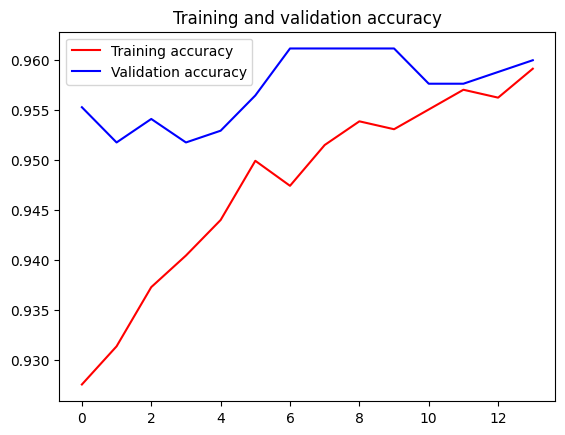

<Figure size 640x480 with 0 Axes>

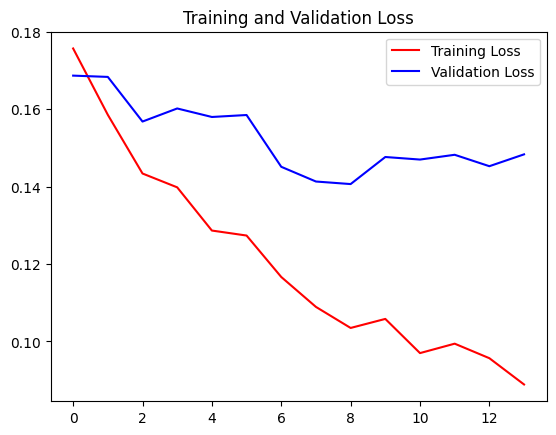

<Figure size 640x480 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")

35/35 [==============================] - 9s 251ms/step - loss: 1.0913 - accuracy: 0.6554
Validation loss: 1.0913
Validation accuracy: 0.6554


In [ ]:
# model.load_weights(checkpoint_filepath)

In [ ]:
model.save('/content/drive/MyDrive/Capstone_ModelV3_3.h5')
# v3_1 ada di m050

In [ ]:
model.save('/content/drive/MyDrive/My_Model')

In [ ]:
export_dir = '/content/drive/MyDrive/saved_model'

In [ ]:
tf.saved_model.save(model, export_dir)

In [ ]:
mode = "default"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [ ]:
# Convert the model.
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/model_v2.tflite')
tflite_model_file.write_bytes(tflite_model)

11007256

In [ ]:
!zip -r /content/drive/MyDrive/model_capstonev2.zip /content/My_Model

  adding: content/My_Model/ (stored 0%)
  adding: content/My_Model/keras_metadata.pb (deflated 96%)
  adding: content/My_Model/assets/ (stored 0%)
  adding: content/My_Model/fingerprint.pb (stored 0%)
  adding: content/My_Model/variables/ (stored 0%)
  adding: content/My_Model/variables/variables.index (deflated 78%)
  adding: content/My_Model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/My_Model/saved_model.pb (deflated 92%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing

In [ ]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : carrier bag
1 : cooking set hike
2 : first aid kit
3 : flashlight
4 : hat
5 : headlamp climbing
6 : jaket
7 : knife
8 : matras camping
9 : outdoor sandals
10 : portable stove
11 : raincoat
12 : sleeping bag
13 : trekking pole
14 : trousers


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files
TESTDI = uploaded=files.upload()
IMG_SIZE = 256


Saving first aid kit.jpg to first aid kit (1).jpg
Saving gelas.png to gelas (1).png
Saving gunting.jpg to gunting.jpg
Saving headlamp.jpg to headlamp (1).jpg
Saving knife.jpg to knife (1).jpg
Saving lampu tenda.jpg to lampu tenda (1).jpg
Saving outdoorssandals25.jpeg to outdoorssandals25 (1).jpeg
Saving outdoorssandals26.jpeg to outdoorssandals26 (1).jpeg
Saving outdoorssandals27.jpeg to outdoorssandals27 (1).jpeg
Saving sandal.jpg to sandal (1).jpg
Saving shoes.jpg to shoes (1).jpg
Saving shoes1.jpg to shoes1 (1).jpg
Saving shoes2.jpg to shoes2 (1).jpg
Saving shoes3.jpg to shoes3 (1).jpg
Saving trash bag.jpg to trash bag (1).jpg


In [ ]:
for her in TESTDI:
    pathi='/content/'+ her
    img=load_img(pathi, target_size=(256, 256))
    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    predicted_label = labels[np.argmax(classes[0])]
    print(f"file {pathi} adalah {predicted_label} ")




1/1 [==============================] - 0s 36ms/step
file /content/first aid kit.jpg adalah first aid kit 
1/1 [==============================] - 0s 40ms/step
file /content/gelas.png adalah gelas plastik 
1/1 [==============================] - 0s 35ms/step
file /content/gunting.jpg adalah knife 
1/1 [==============================] - 0s 34ms/step
file /content/headlamp.jpg adalah headlamp climbing 
1/1 [==============================] - 0s 35ms/step
file /content/knife.jpg adalah knife 
1/1 [==============================] - 0s 22ms/step
file /content/lampu tenda.jpg adalah lampu tenda 
1/1 [==============================] - 0s 22ms/step
file /content/outdoorssandals25.jpeg adalah outdoor sandals 
1/1 [==============================] - 0s 24ms/step
file /content/outdoorssandals26.jpeg adalah outdoor sandals 
1/1 [==============================] - 0s 23ms/step
file /content/outdoorssandals27.jpeg adalah shoes 
1/1 [==============================] - 0s 24ms/step
file /content/sandal.jpg a

IndexError: ignored

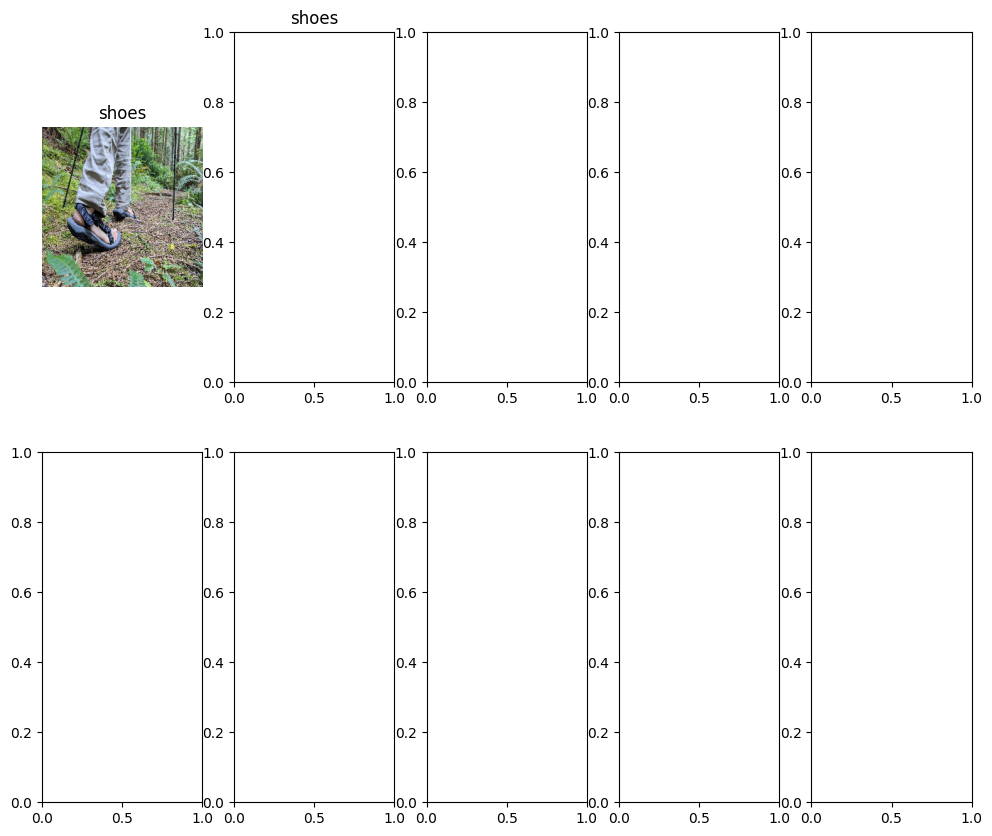

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(images[j])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
filesi=os.listdir(source_path_flashlight)

# Load InceptionV3 Saved Model

In [ ]:
# layer.trainable=True
# location drive/u/2
!gdown 1hp4pS3W4RbIR_H9OBNVz6nHB8Iz1GXL5

Downloading...
From: https://drive.google.com/uc?id=1hp4pS3W4RbIR_H9OBNVz6nHB8Iz1GXL5
To: /content/Capstone_Model.h5
100% 1.96G/1.96G [00:45<00:00, 42.7MB/s]


In [ ]:
# layer.trainable=False
!gdown 1jrBy-GF-vsVuCcT9q8U9p0W9IfKNtja5

Downloading...
From: https://drive.google.com/uc?id=1jrBy-GF-vsVuCcT9q8U9p0W9IfKNtja5
To: /content/Capstone_Model.h5
100% 1.89G/1.89G [00:31<00:00, 60.7MB/s]


In [ ]:
# layer.trainable = False with new combination layer
!gdown 13HsTYnHr7Fw4CuUOcrc7NfpsWi6orZlI

Downloading...
From: https://drive.google.com/uc?id=13HsTYnHr7Fw4CuUOcrc7NfpsWi6orZlI
To: /content/Capstone_Model.h5
100% 40.4M/40.4M [00:00<00:00, 73.9MB/s]


In [ ]:
# model2 ver 2
# !gdown 17ZhmQ8aByco8teS49OdrqIrZEV8hezcT

# model ver 2.1
# !gdown 1PDkMWyJUfZ3PGaheXiMVaApLNnoKIKVQ

# model ver 2.2
# !gdown 1P1cAdEMi0w5pZPL4zTEAXlaQx5PHfqYB

# model cer 2.3
# !gdown 1IBC2vIF9gxGlX1CmY68QP5tzpix7ROuw

# model ver 3.3
!gdown 1-2EQutnGut_m-2w-jgOc8EsNbfEJ9OUU

Downloading...
From: https://drive.google.com/uc?id=1-2EQutnGut_m-2w-jgOc8EsNbfEJ9OUU
To: /content/Capstone_ModelV3_3.h5
100% 127M/127M [00:08<00:00, 15.7MB/s]


In [ ]:
model_path = '/content/Capstone_ModelV3_3.h5'

In [ ]:
model = tf.keras.models.load_model(model_path)

In [ ]:
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [ ]:
history = loaded_model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=int(0.15*len(validation_generator)),
                    callbacks= [my_callback],
                    class_weight=weight)

Epoch 1/10
106/492 [=====>........................] - ETA: 3:30 - loss: 0.8846 - accuracy: 0.7460

In [ ]:
loaded_model.save('/content/drive/MyDrive/Capstone_Modelv3.h5')

In [ ]:
model.evaluate(train_generator)

 25/492 [>.............................] - ETA: 3:49 - loss: 0.1773 - accuracy: 0.9488

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


492/492 [==============================] - 270s 531ms/step - loss: 0.1386 - accuracy: 0.9583


[0.13862411677837372, 0.9582892656326294]

In [ ]:
model.evaluate(validation_generator)

55/55 [==============================] - 13s 234ms/step - loss: 0.1067 - accuracy: 0.9672


[0.10669269412755966, 0.9671533107757568]